In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import dataset

df = pd.read_csv("./Datasets/height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


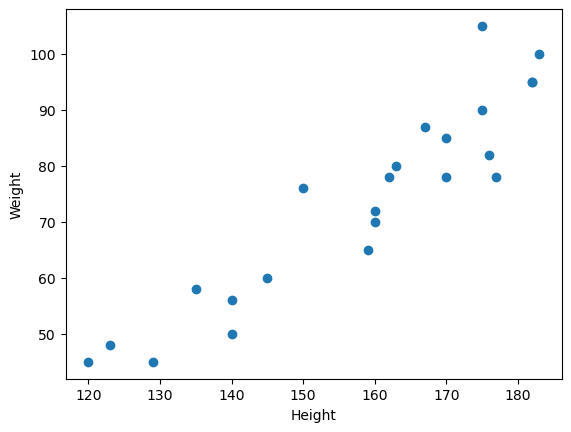

In [4]:
# find relation between Features

plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [5]:
# finding coralation between variables / this corelltion is pearson corellation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


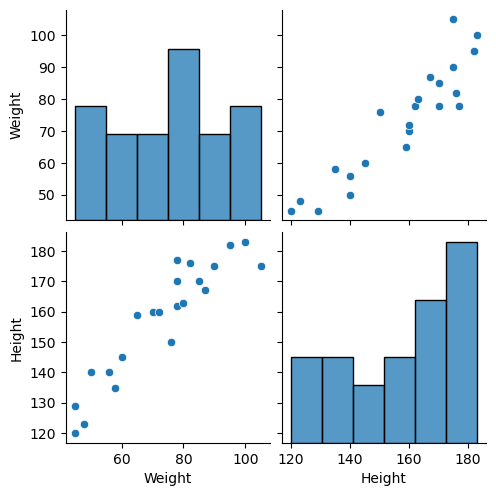

In [6]:
import seaborn as sns
sns.pairplot(df)
#

In [7]:
## Independent and Dependent Feature
X_seires = df['Weight']
X = df[["Weight"]] ## ALL Independent Feature is store as DataFrame / 2d array
y = df['Height'] ## series and 1d array

In [8]:
## Split test and train dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
X_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [10]:
# Standardation Scale features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # mean = 0, std = 1
X_test = scaler.transform(X_test) # use mean and std from train data to transform test data

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

# model trainning
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [12]:
# value of coffecinte
# value of intercept

model.coef_
model.intercept_

156.47058823529412

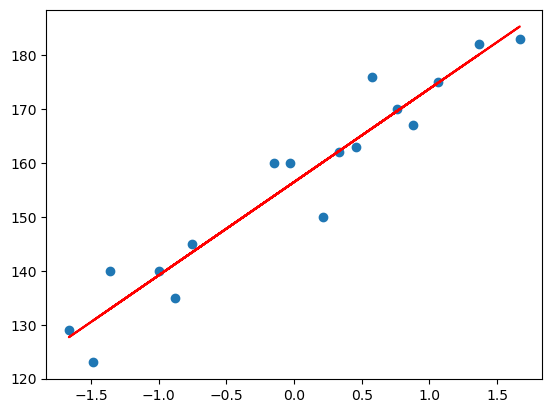

In [13]:
# plot best fit line
# model.predict this method predict value
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()

In [14]:
# Prediction for test data

y_pred = model.predict(X_test)

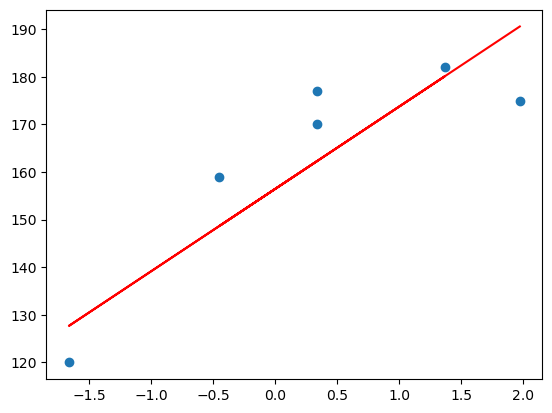

In [18]:
y_pred

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [16]:
# Performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

114.84069295228699
9.665125886795005
10.716374991212605


In [34]:
# R2 score

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7360826717981276

In [35]:
# adjusted r2 score

adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_score

0.6701033397476595

Leniar Regression using OLS

In [36]:
# OLS Method

import statsmodels.api as sm

ols = sm.OLS(y_train, X_train).fit()


In [37]:
pred = ols.predict(X_test)
print(pred)


[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [38]:
ols.summary()

c:\Users\harshad.parmar\ML\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                       0.664
Time:                        13:01:28   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
s = r2_score(y_test, pred)
s

-56.90793752372127

In [41]:
# Predict for new Data

model.predict(scaler.transform([[72],[89]]))

array([1401.94139895, 1696.01089592])

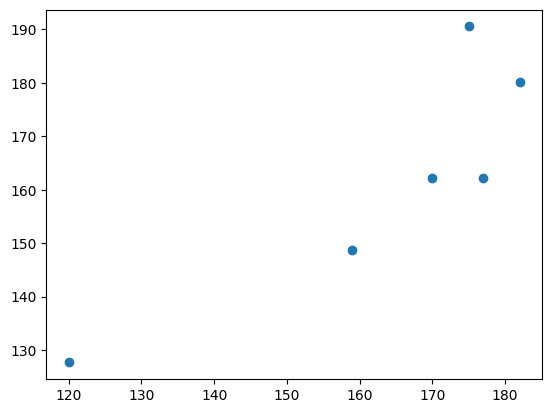

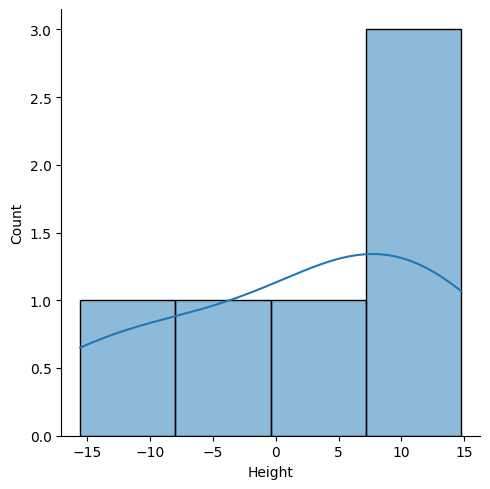

In [45]:
plt.scatter(y_test, y_pred)
reseduals = y_test - y_pred

sns.displot(reseduals, kde=True)